### This notebook is for messing around with generating and plotting flows, particularly as derived from the stream function. Most of the code here will be packaged into `FiniteDifference.py` or `LiquidCrystalHelper.py` to be used in actual simulations

In [2]:
import sys, os
sys.path.insert(0, os.path.join(os.path.abspath('..'), 'src'))

### Import necessary libraries

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import FiniteDifference as fd

In [9]:
%matplotlib inline
dpi = 400
mpl.rcParams['figure.dpi'] = dpi

### Set up spacial parameters for flows

In [46]:
shape = (20, 20)
L = [3, 3]
x = np.linspace(-L[0], L[0], num=shape[0])
y = np.linspace(-L[1], L[1], num=shape[1])
X, Y = np.meshgrid(x, y, indexing='ij')
hx = X[1, 0] - X[0, 0]
hy = Y[0, 1] - Y[0, 0]

### Generate plot for constant flow in y-direction

Text(0, 0.5, 'y')

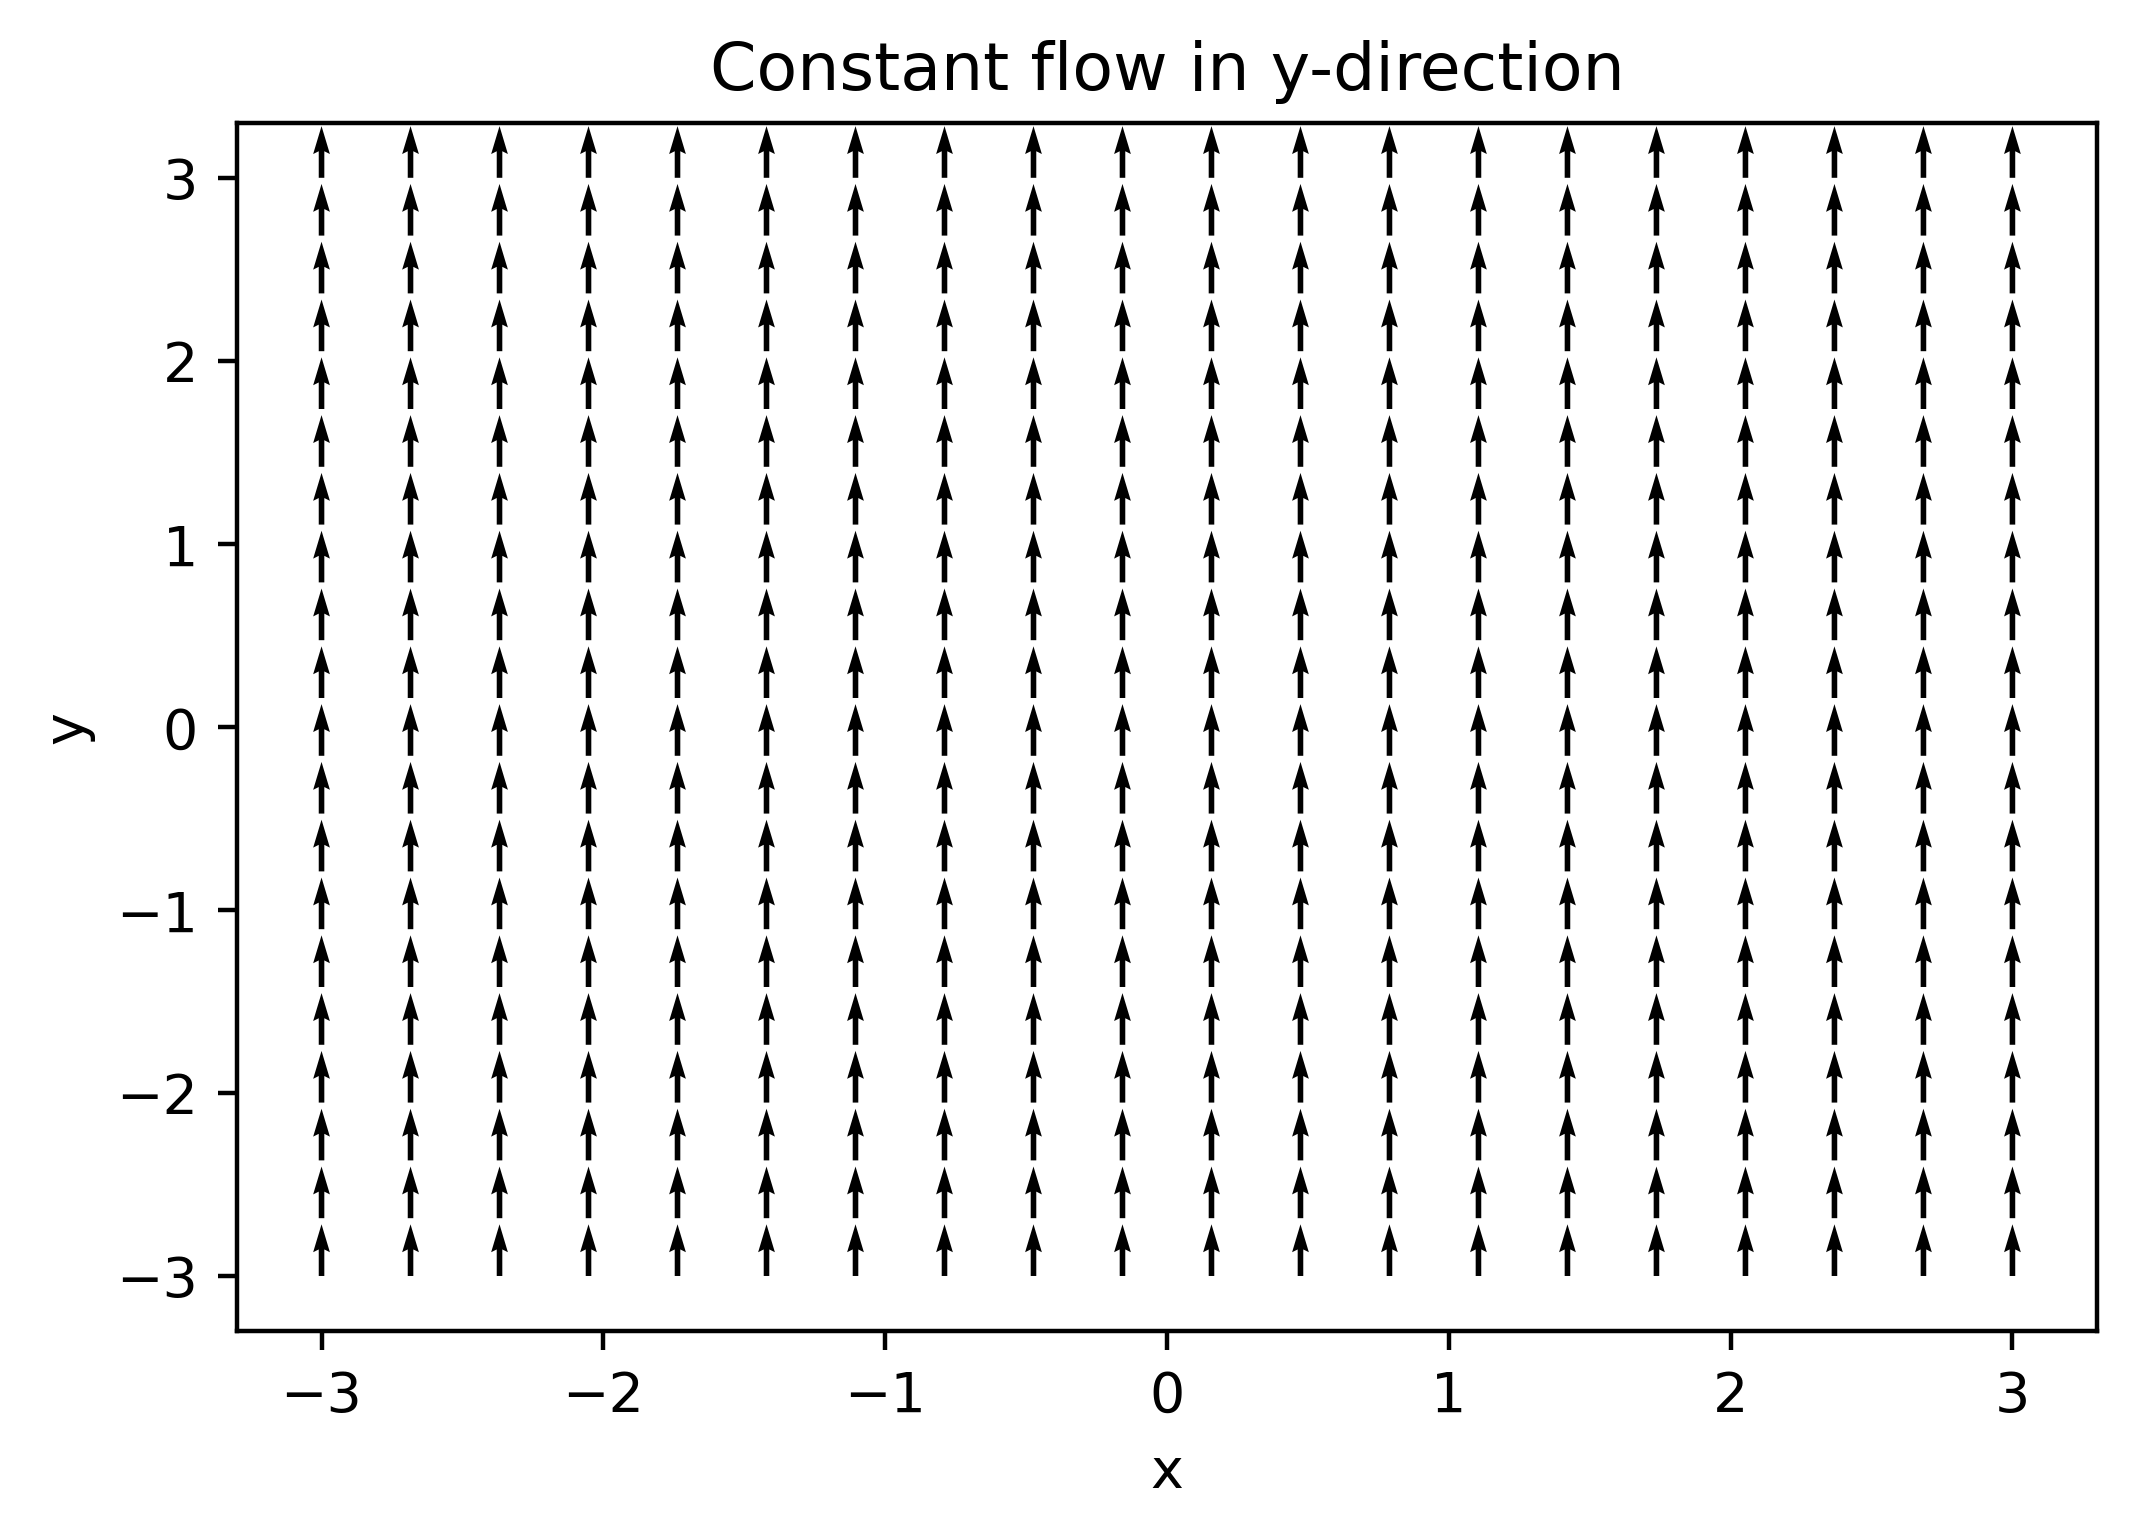

In [25]:
vx = np.zeros(shape)
vy = np.ones(shape)

fig, ax = plt.subplots()
ax.quiver(X, Y, vx, vy)
ax.set_title("Constant flow in y-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")

### Generate swirly flow around the origin

Text(0, 0.5, 'y')

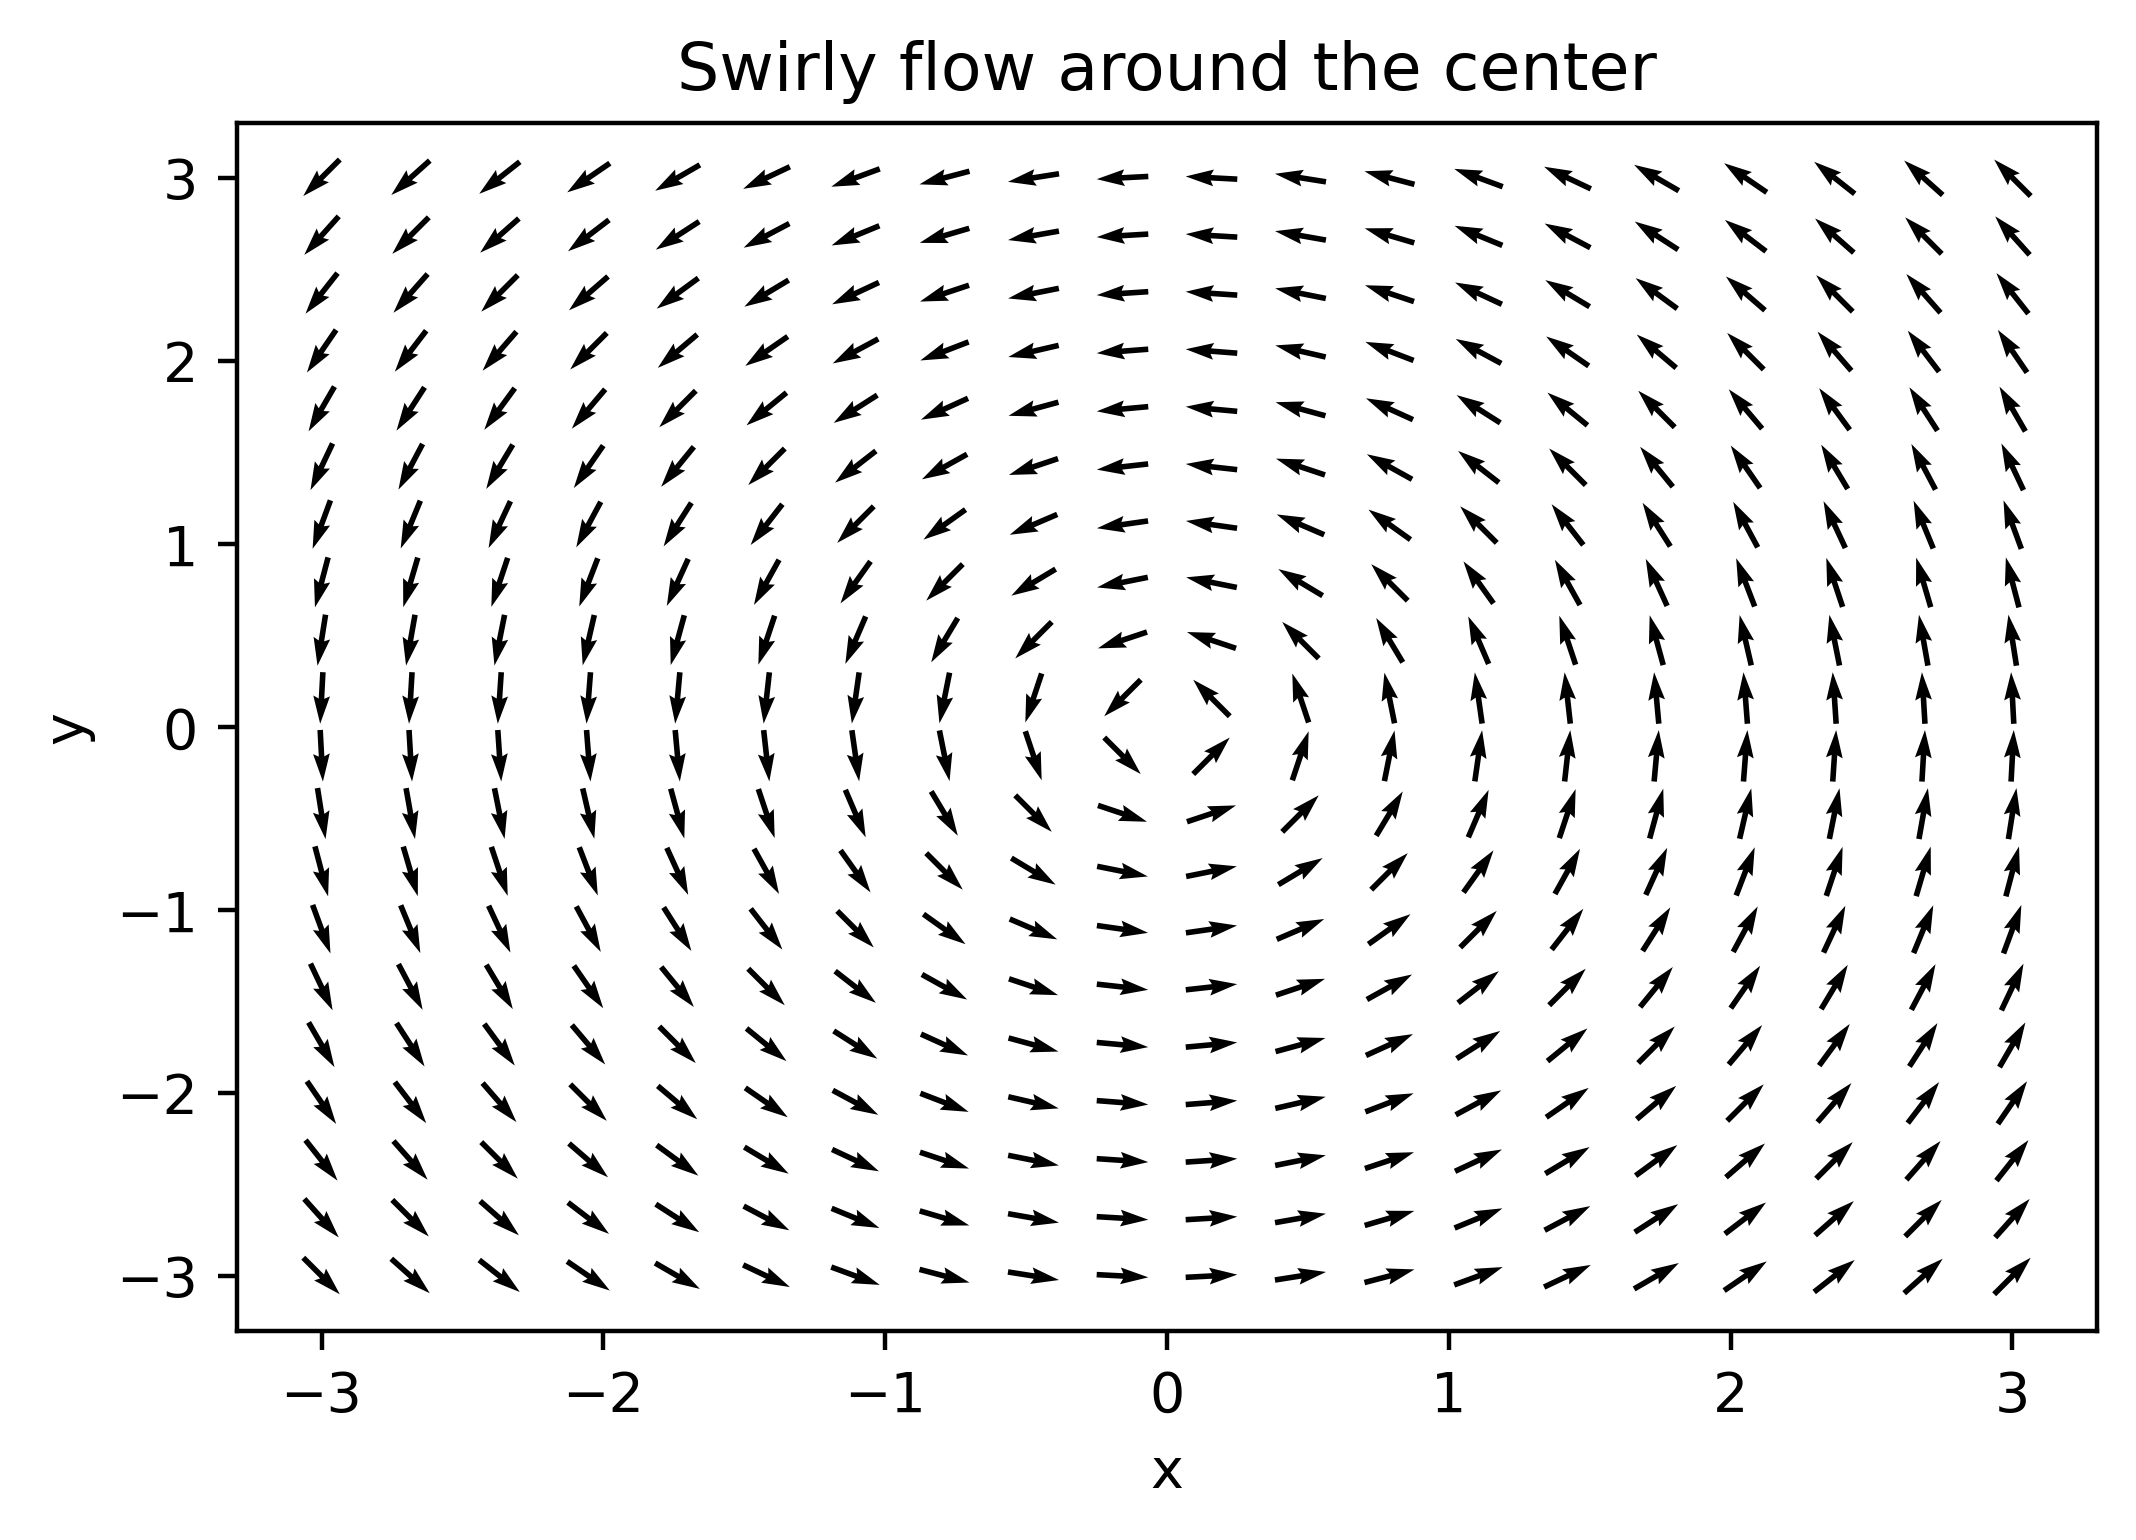

In [26]:
vx = -Y/np.sqrt(X**2 + Y**2)
vy = X/np.sqrt(X**2 + Y**2)

fig, ax = plt.subplots()
ax.quiver(X, Y, vx, vy, pivot='middle')
ax.set_title("Swirly flow around the center")
ax.set_xlabel("x")
ax.set_ylabel("y")

### Create uniform stream in the x-direction

Text(0, 0.5, 'y')

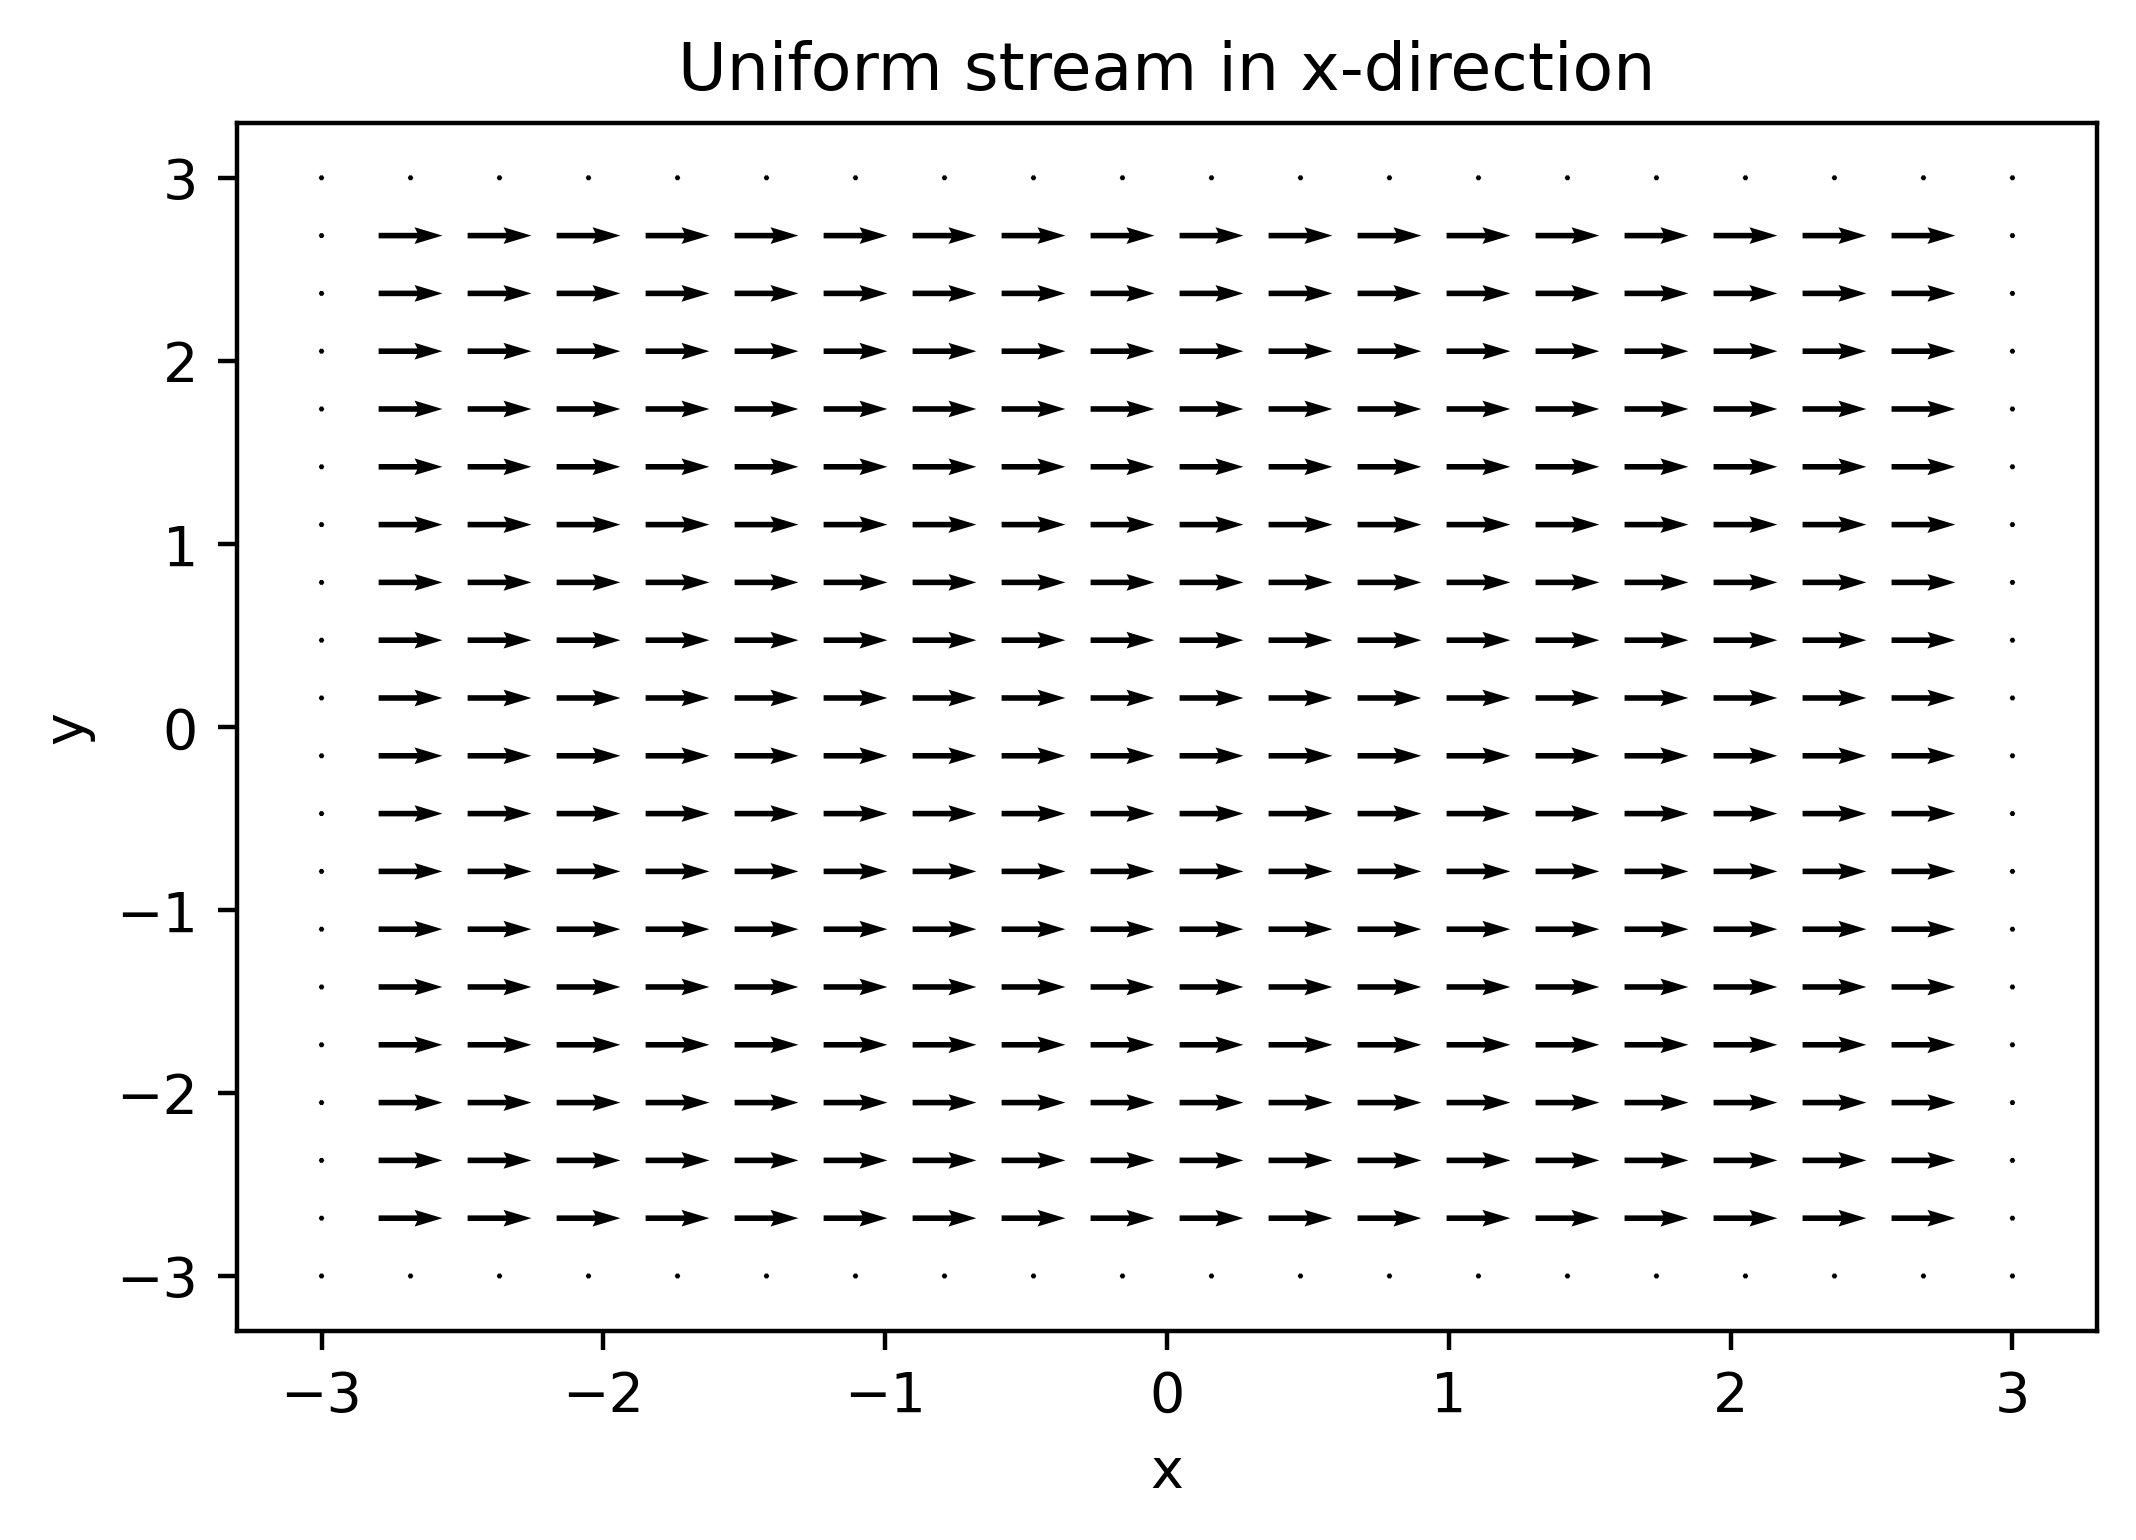

In [27]:
psi = Y
vx, vy = fd.curl(psi, hx, hy, calc_bds=False)

fig, ax = plt.subplots()
ax.quiver(X, Y, vx, vy, pivot='middle')
ax.set_title("Uniform stream in x-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")

### Simple shear flows

Text(0, 0.5, 'y')

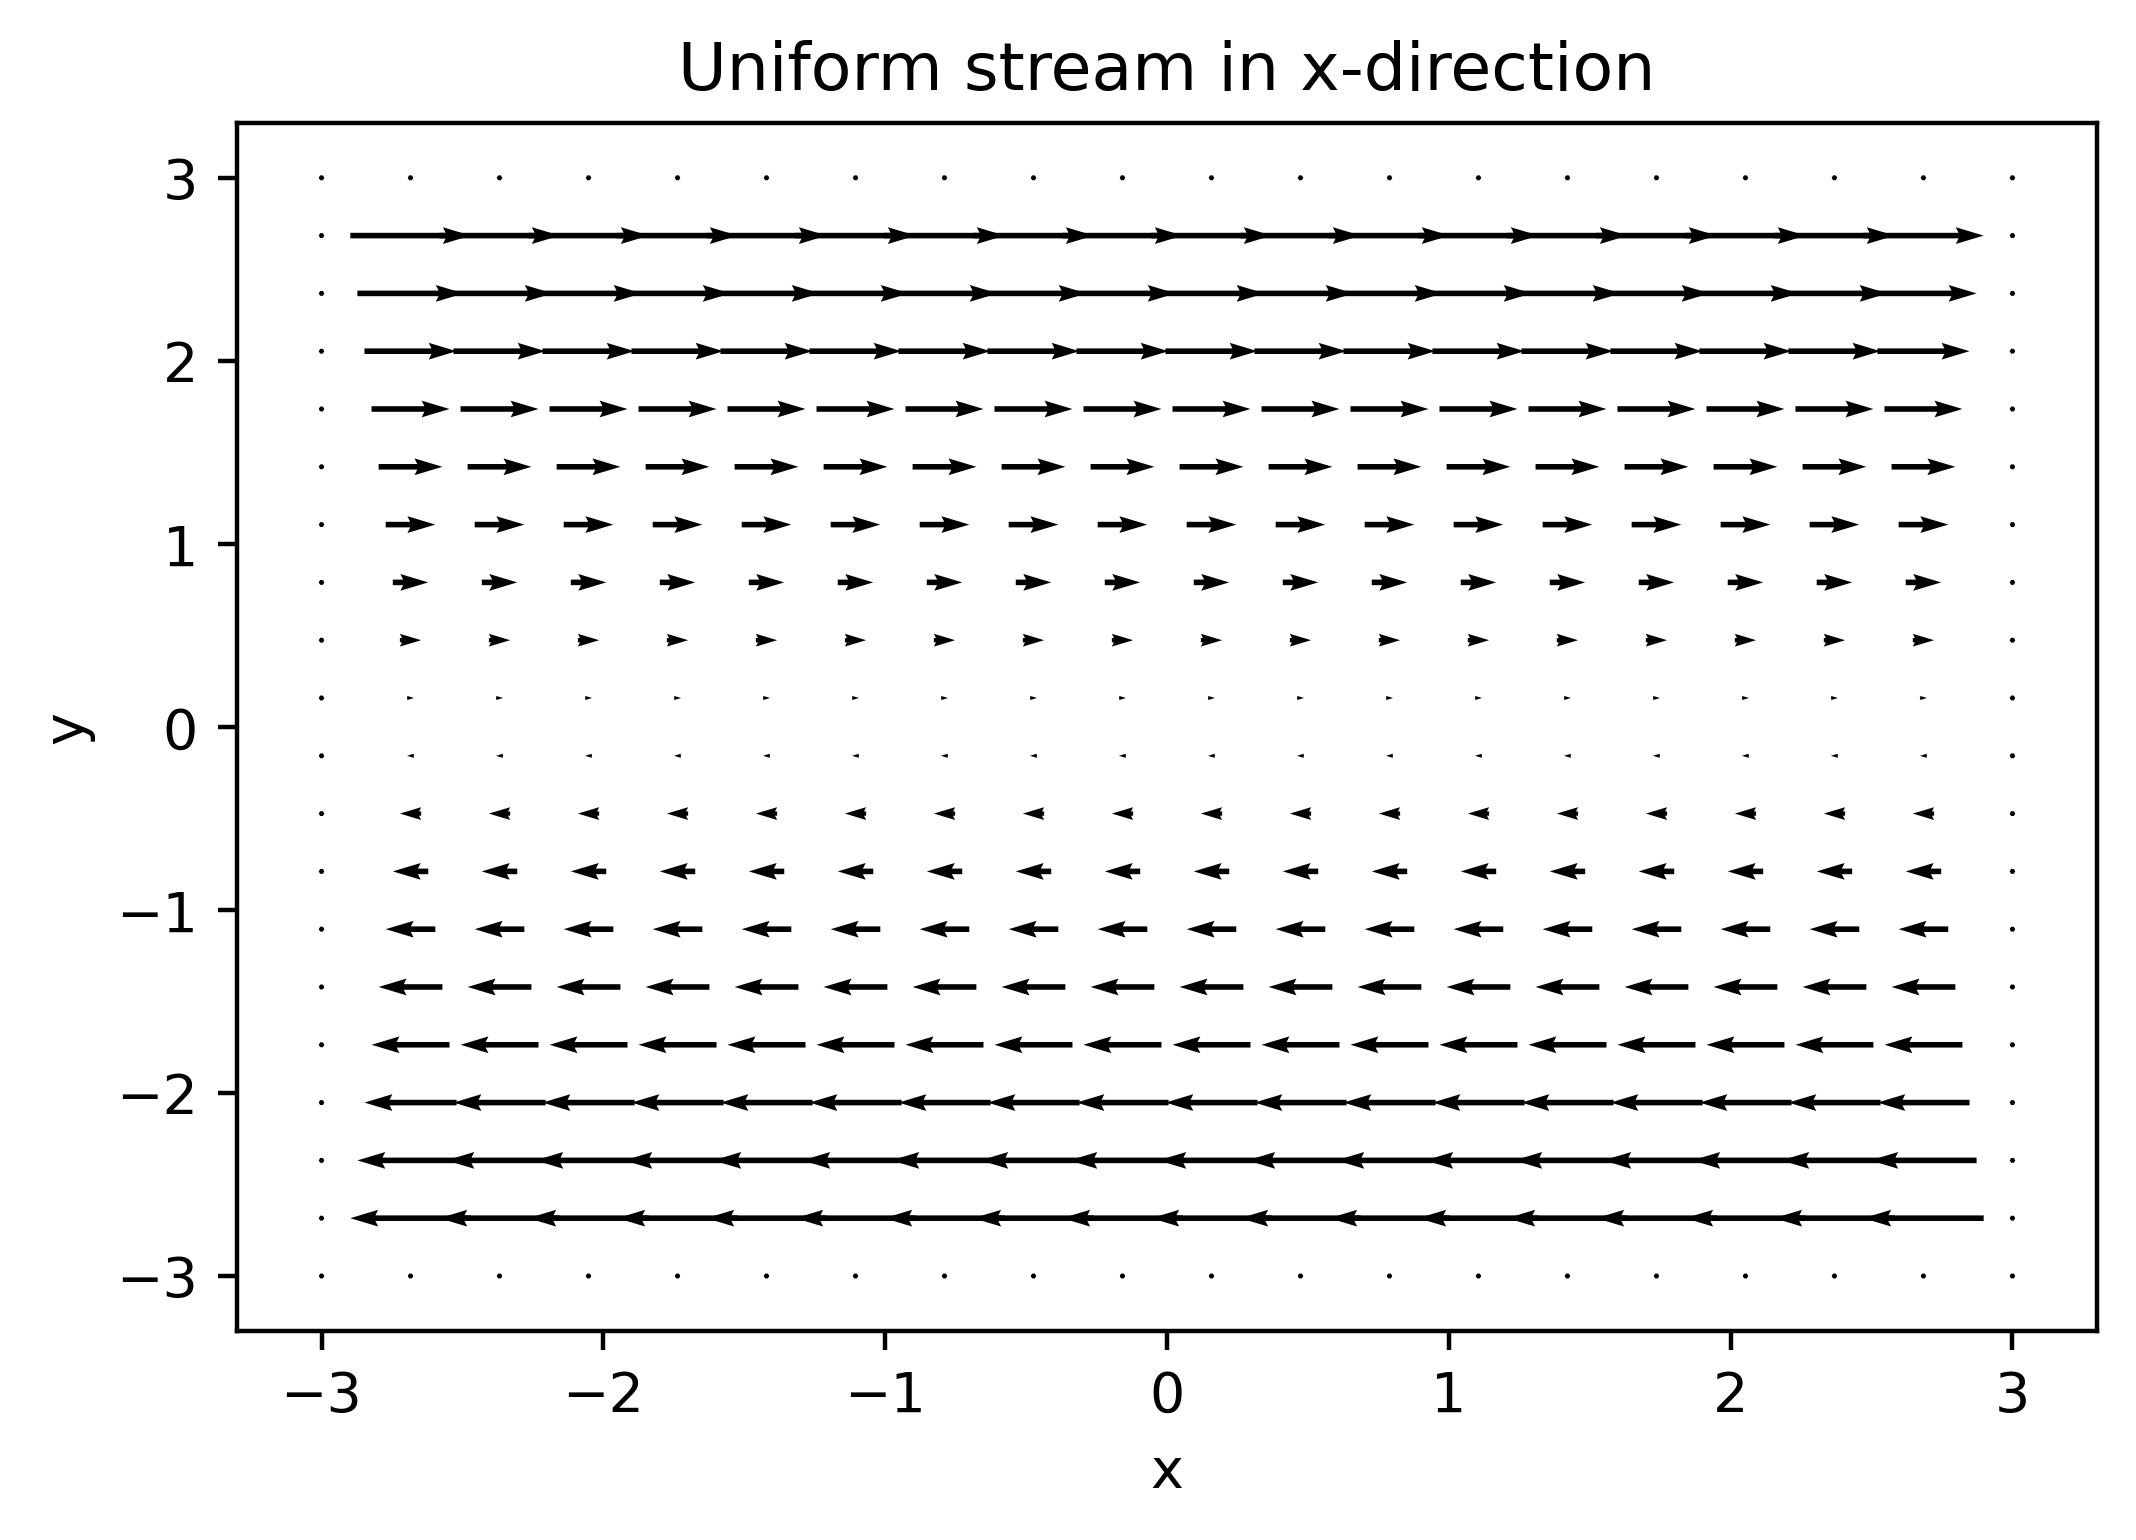

In [28]:
psi = Y**2/2
vx, vy = fd.curl(psi, hx, hy, calc_bds=False)

fig, ax = plt.subplots()
ax.quiver(X, Y, vx, vy, pivot='middle')
ax.set_title("Uniform stream in x-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")

### Rectangular corner flow

Text(0, 0.5, 'y')

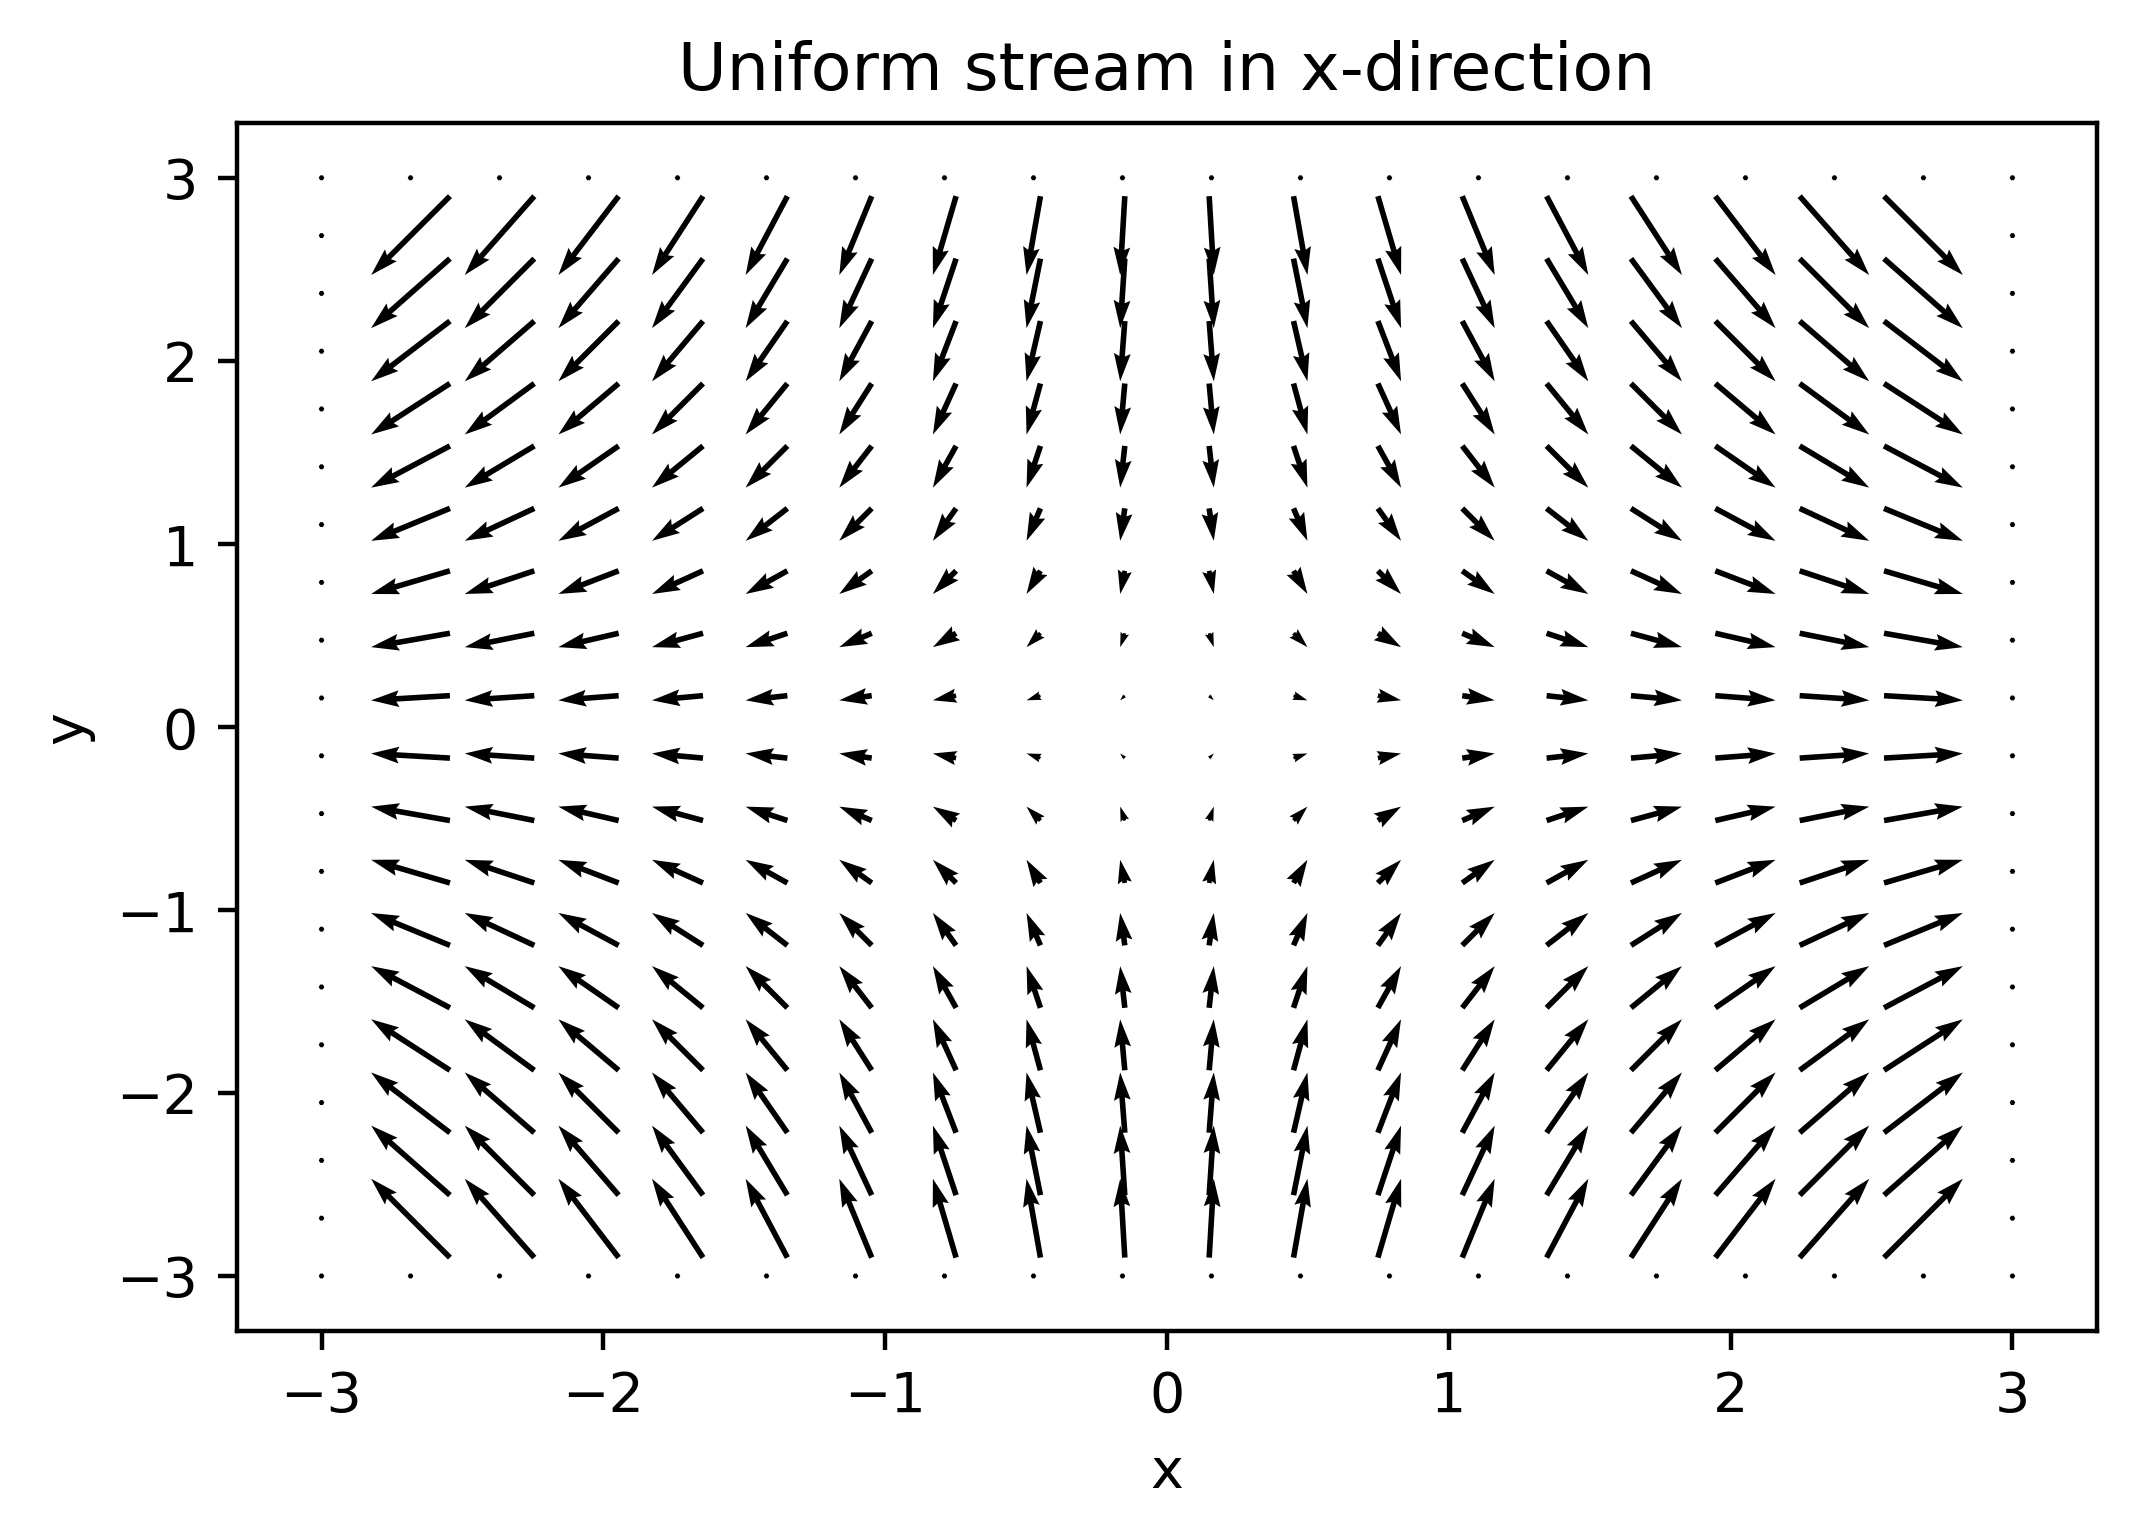

In [29]:
psi = X*Y
vx, vy = fd.curl(psi, hx, hy, calc_bds=False)

fig, ax = plt.subplots()
ax.quiver(X, Y, vx, vy, pivot='middle')
ax.set_title("Uniform stream in x-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")

### Normalize the corner flow

Text(0, 0.5, 'y')

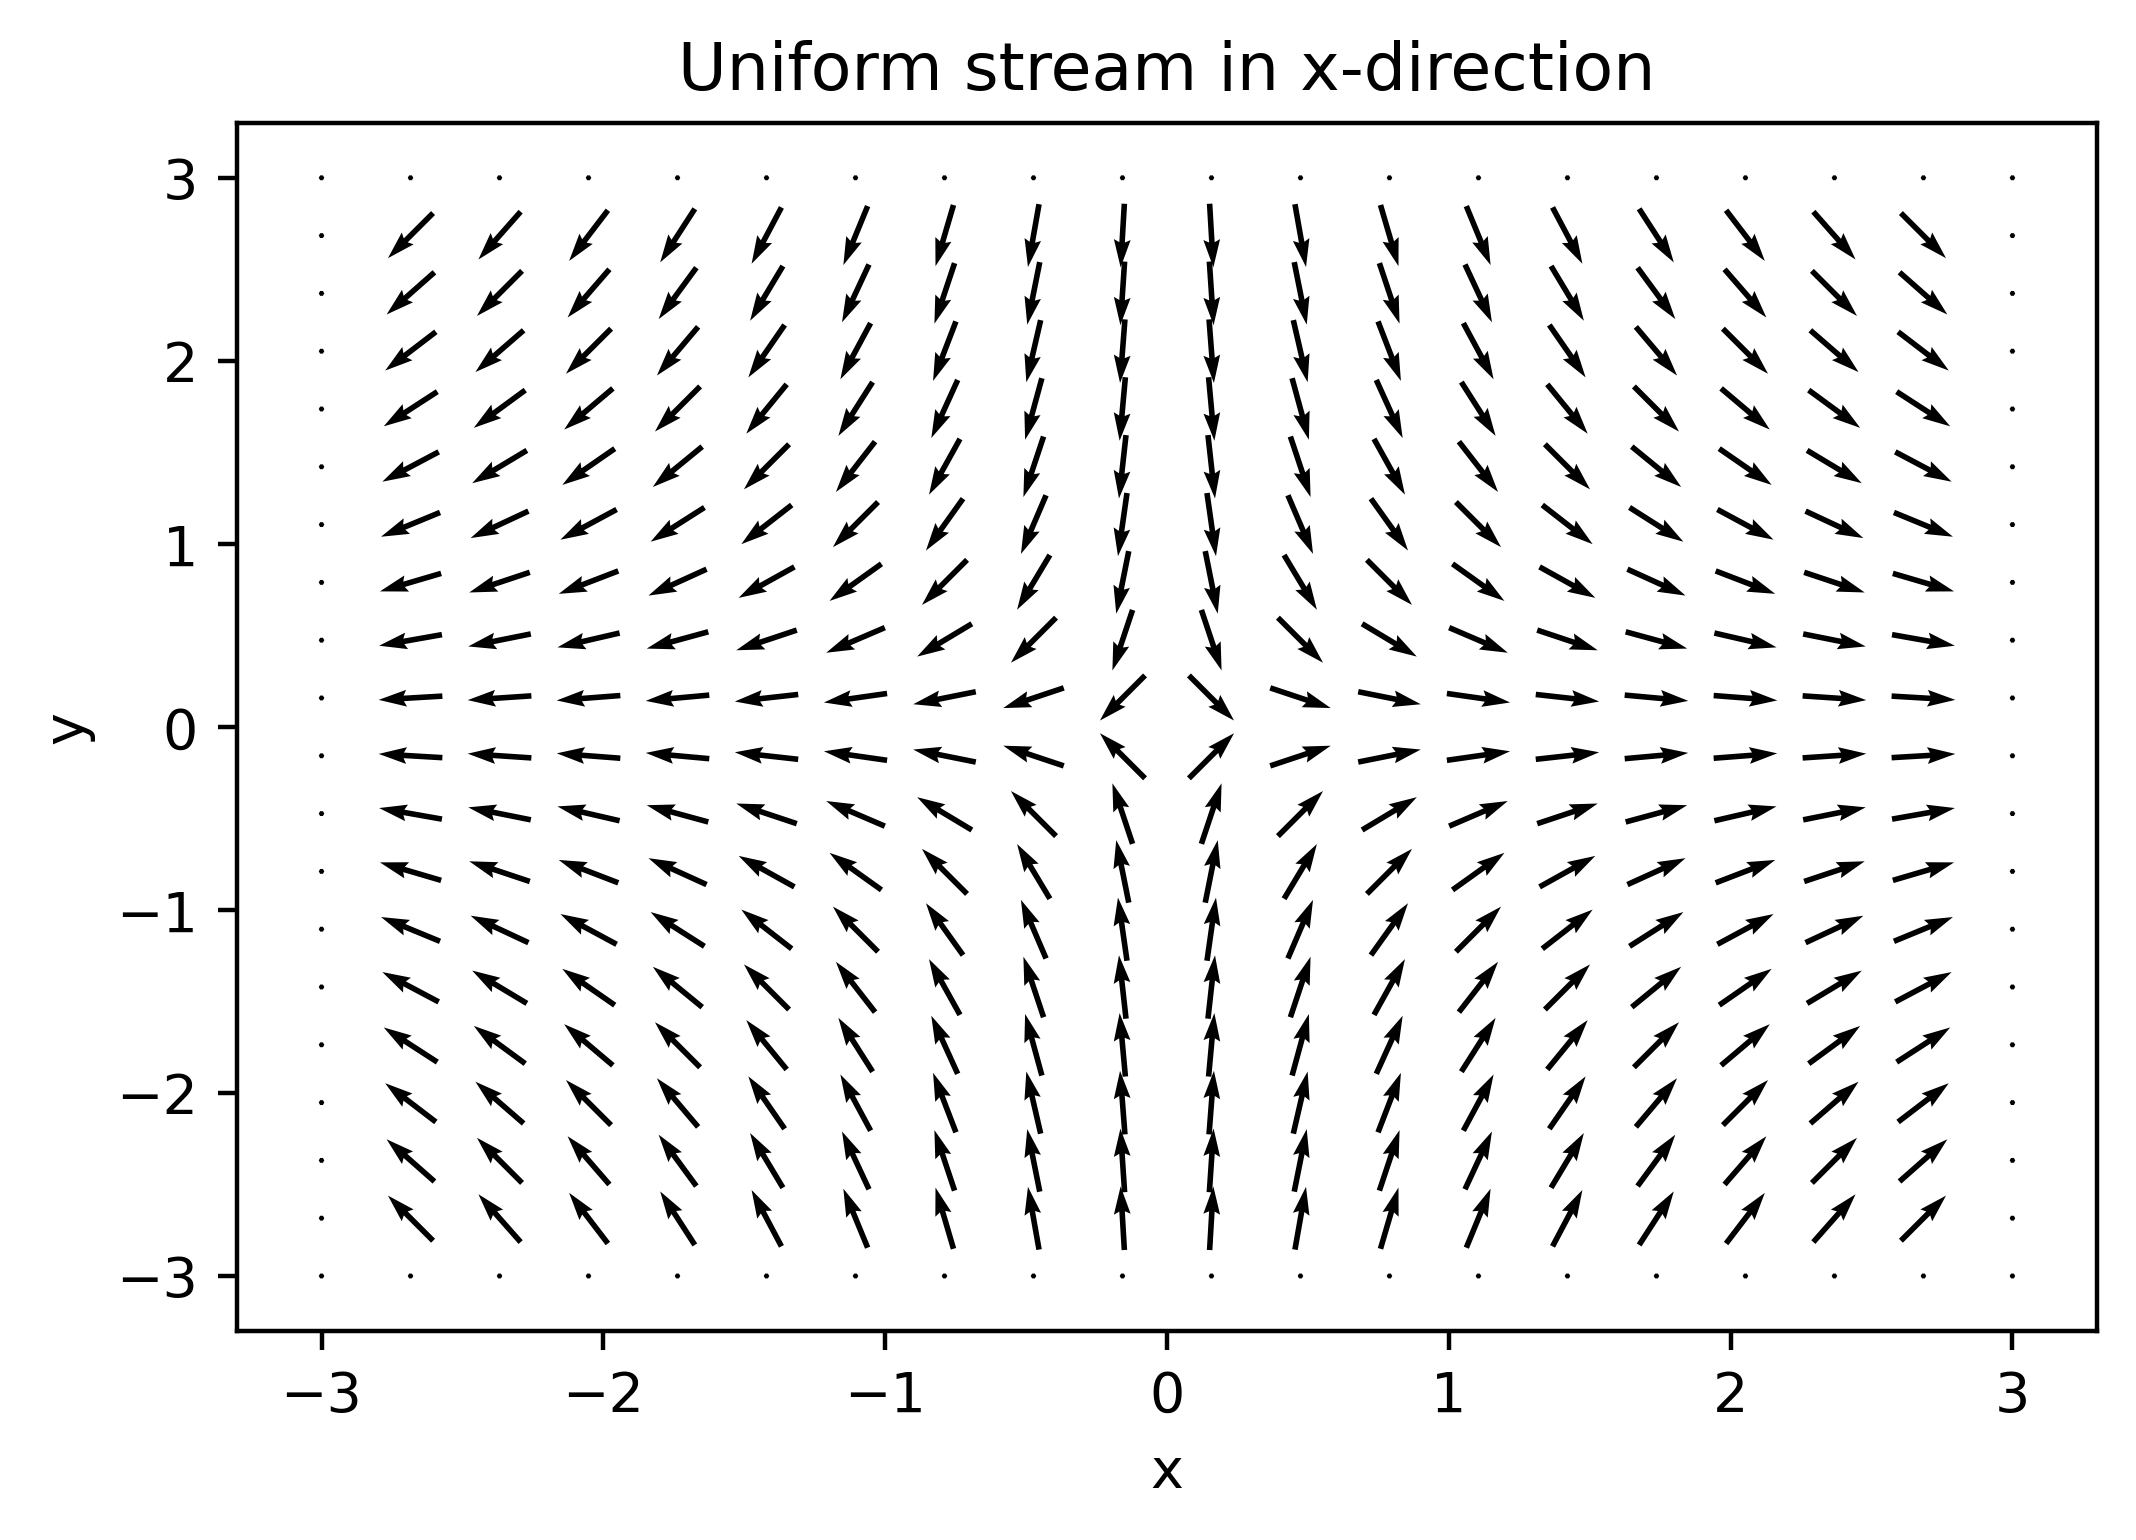

In [47]:
psi = X*Y
vx, vy = fd.curl(psi, hx, hy, calc_bds=False)

x_mask = np.where(vx != 0)
y_mask = np.where(vy != 0)
vx_norm = np.zeros(vx.shape)
vy_norm = np.zeros(vy.shape)
vx_norm[x_mask] = vx[x_mask] / np.sqrt(vx[x_mask]**2 + vy[x_mask]**2)
vy_norm[y_mask] = vy[y_mask] / np.sqrt(vx[y_mask]**2 + vy[y_mask]**2)


fig, ax = plt.subplots()
ax.quiver(X, Y, vx_norm, vy_norm, pivot='middle')
ax.set_title("Uniform stream in x-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")

### Plot the streamlines

### For this we need a finer domain

In [50]:
n = 1000
L = 3
x = np.linspace(-L, L, num=n)
y = np.linspace(-L, L, num=n)
X, Y = np.meshgrid(x, y, indexing='ij')

Text(0, 0.5, 'y')

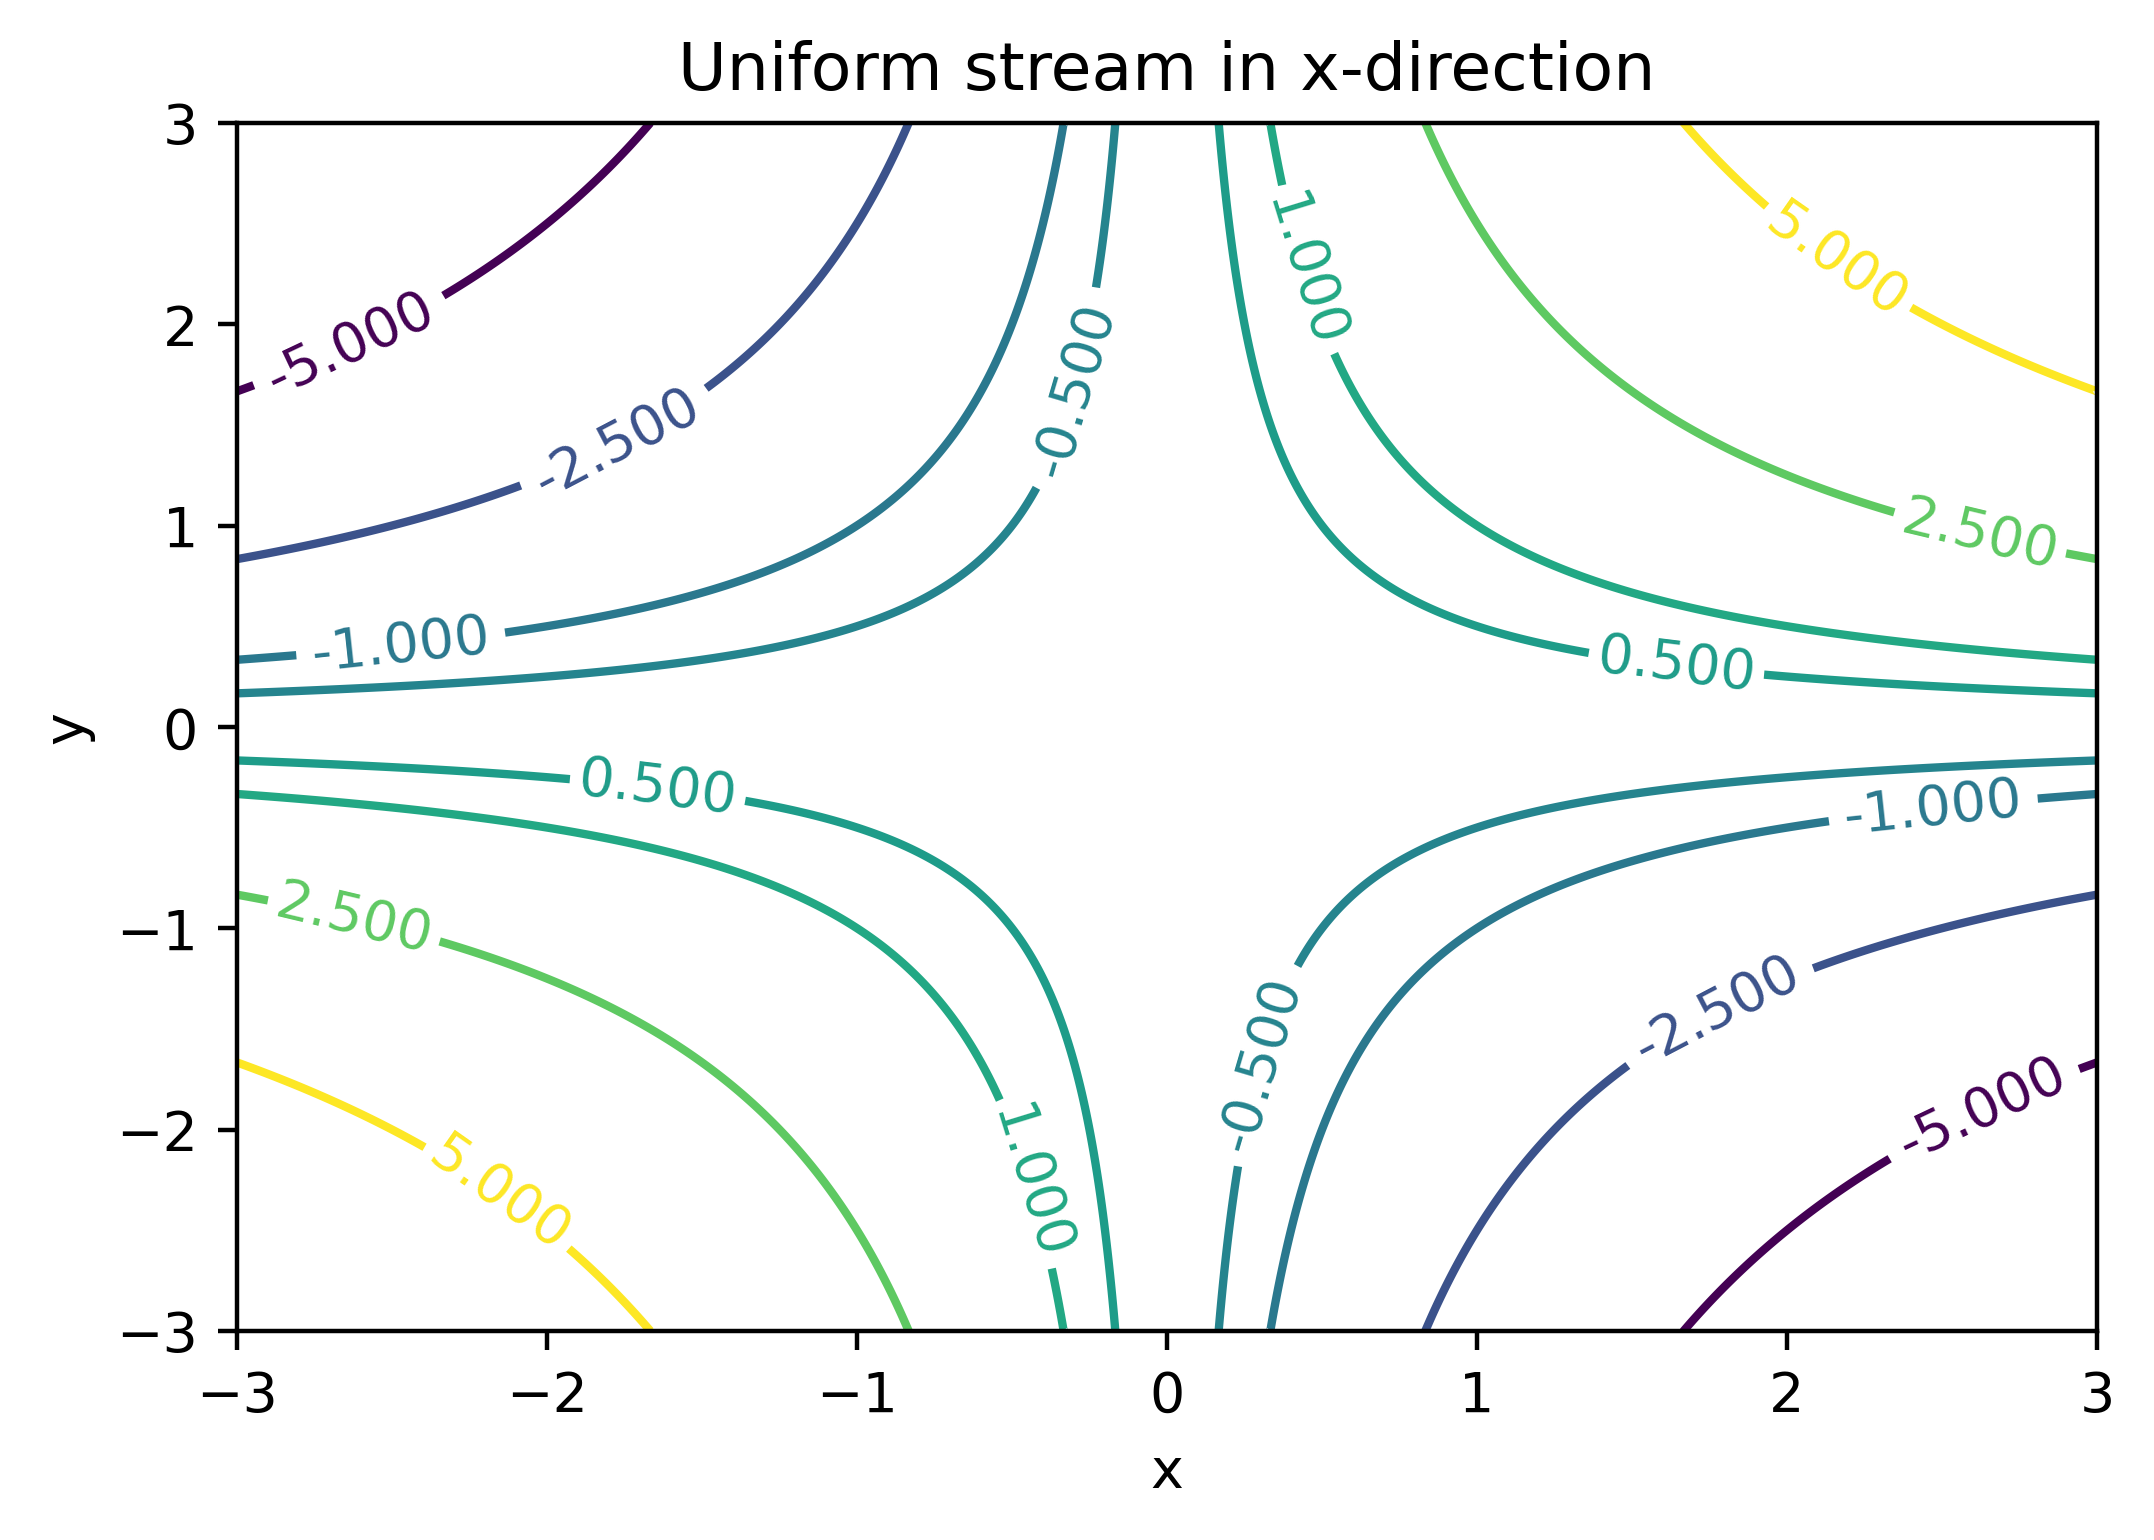

In [45]:
psi = X*Y
levels = [-5, -2.5, -1, -0.5, 0.5, 1, 2.5, 5]

fig, ax = plt.subplots()
cp = ax.contour(X, Y, psi, levels)
ax.clabel(cp)
ax.set_title("Uniform stream in x-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")